In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np

xlsx = pd.ExcelFile('Dados/PDFJaneiro.xlsx')
df = pd.read_excel(xlsx, 'Planilha1')
#df.set_index('Data',inplace=True)
df = df.rename(columns={"Nr. Ordem" : "Nr. Ordem Abast.","Nr." : "Nr. Lcto Fitcard", "Exerc. Empenho" : "Exerc.", "Unnamed: 9" : "Empenho", "Exerc..1" : "Exerc.", "Tipo.1" : "Tipo Nota Fiscal", "Valor" : "Valor Abast."})
#Tirei o valor ajustado para testar a tabela que representa o mês de Janeiro e nela vários valores da coluna Valor Ajustado estão faltando
df = df.drop(["Lcto", "Exerc.", "Lançamento", "Nr. Ordem Abast.", "Nr. Lcto Fitcard", "Empenho", "Tipo Nota Fiscal", "Serie", "EQAL", "Liquidação", "Numero", "Valor Ajustado"], axis = 1)
df["Nr Litros"] = df["Nr Litros"] / 1000
#Renomeia os nomes dos produtos para facilitar o plot de gráficos
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
0,02/01/2019,79417,AJM-9211,Abast,GASOLINA,23.200,99.53
1,02/01/2019,79464,BCD-6525,Abast,ETANOL,41.441,115.62
2,02/01/2019,79466,BCD-6527,Abast,ETANOL,46.090,128.59
3,02/01/2019,79432,ARV-7425,Abast,ETANOL,45.168,126.02
4,02/01/2019,79473,AJU-6529,Abast,DIESEL,104.080,363.24
...,...,...,...,...,...,...,...
237,31/01/2019,79463,BCD-6524,Abast,ETANOL,39.120,97.41
238,31/01/2019,79422,AJN-3794,Abast,GASOLINA,47.350,193.66
239,31/01/2019,79456,BCC-4704,Abast,ETANOL,46.269,115.21
240,31/01/2019,79450,BAB-6291,Abast,DIESEL,47.991,167.49


In [11]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

43.48261570247936

In [12]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
139,21/01/2019,87010,EQU-8710,Consum,GASOLINA,4.279,17.93
25,04/01/2019,93011,ATW-9412,Abast,GASOLINA,6.140,26.34
142,21/01/2019,93014,ATW-9372,Abast,GASOLINA,6.621,27.74
77,11/01/2019,79436,ASZ-6988,Abast,GASOLINA,7.360,30.84
121,17/01/2019,79437,ASZ-7083,Abast,GASOLINA,7.489,31.38
...,...,...,...,...,...,...,...
214,29/01/2019,78012,AKF-2842,Abast,DIESEL,121.209,423.02
233,31/01/2019,78012,AKF-2842,Abast,DIESEL,126.670,442.08
61,09/01/2019,79473,AJU-6529,Abast,DIESEL,127.230,444.03
70,11/01/2019,78040,AEO-9326,Abast,DIESEL,135.650,473.42


In [13]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
136,18/01/2019,79473,AJU-6529,Abast,DIESEL,138.891,484.73
70,11/01/2019,78040,AEO-9326,Abast,DIESEL,135.650,473.42
61,09/01/2019,79473,AJU-6529,Abast,DIESEL,127.230,444.03
233,31/01/2019,78012,AKF-2842,Abast,DIESEL,126.670,442.08
214,29/01/2019,78012,AKF-2842,Abast,DIESEL,121.209,423.02
...,...,...,...,...,...,...,...
23,04/01/2019,79459,BCD-6855,Abast,ETANOL,43.731,122.01
124,17/01/2019,79463,BCD-6524,Abast,ETANOL,43.591,117.26
37,07/01/2019,79470,BCD-6851,Abast,GASOLINA,43.550,182.47
187,25/01/2019,79413,AHQ-1425,Abast,GASOLINA,43.511,182.31


In [23]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Tipo,Produto,Nr Litros,Valor Abast.
120,17/01/2019,79421,AJN-3792,Abast,GASOLINA,58.360,244.53
204,28/01/2019,79445,ATL-9829,Abast,GASOLINA,53.539,224.33
17,03/01/2019,92046,ALE-6725,Abast,GASOLINA,52.520,225.31
203,28/01/2019,79444,ATL-9834,Abast,GASOLINA,51.530,215.91
49,08/01/2019,79463,BCD-6524,Abast,GASOLINA,50.310,210.80
56,09/01/2019,77097,AAW-2629,Abast,GASOLINA,50.120,210.00
178,24/01/2019,92046,ALE-6725,Abast,GASOLINA,49.561,207.66
31,07/01/2019,79461,BCD-6871,Abast,GASOLINA,49.380,206.90
93,15/01/2019,79457,BCC-4713,Abast,GASOLINA,48.279,202.29
30,07/01/2019,79452,BCC-4699,Abast,GASOLINA,48.230,202.08


In [18]:
df["Produto"].value_counts()

ETANOL      115
GASOLINA     84
DIESEL       43
Name: Produto, dtype: int64

In [16]:
df["Produto"].value_counts(normalize=True)

ETANOL      0.475207
GASOLINA    0.347107
DIESEL      0.177686
Name: Produto, dtype: float64

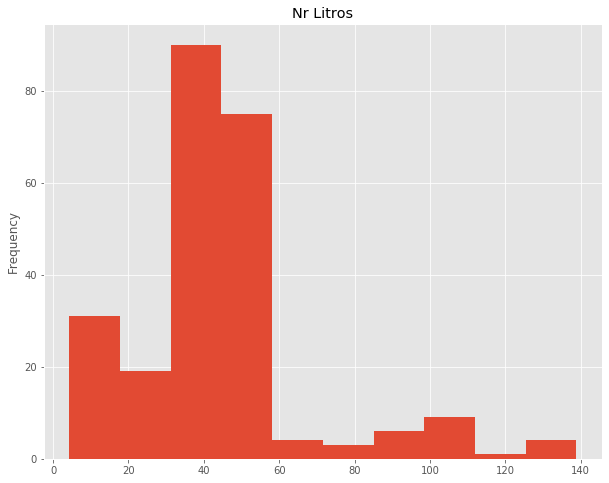

In [41]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

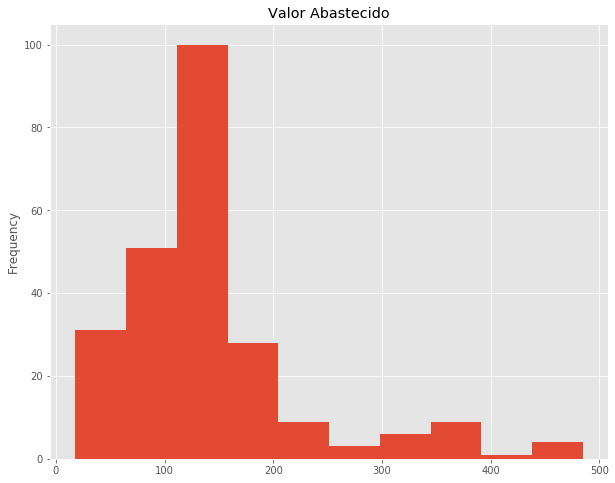

In [42]:
df["Valor Abast."].plot(kind='hist', title = "Valor Abastecido")

In [43]:
df["Nr Litros"].describe()

count    242.000000
mean      43.482616
std       23.896279
min        4.279000
25%       34.202500
50%       42.795500
75%       48.917750
max      138.891000
Name: Nr Litros, dtype: float64

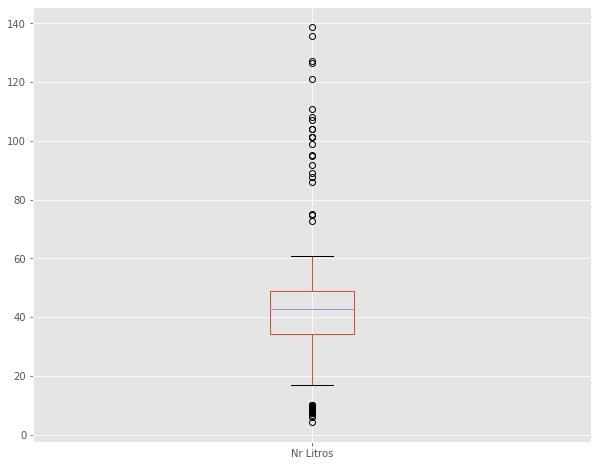

In [44]:
df["Nr Litros"].plot(kind="box")

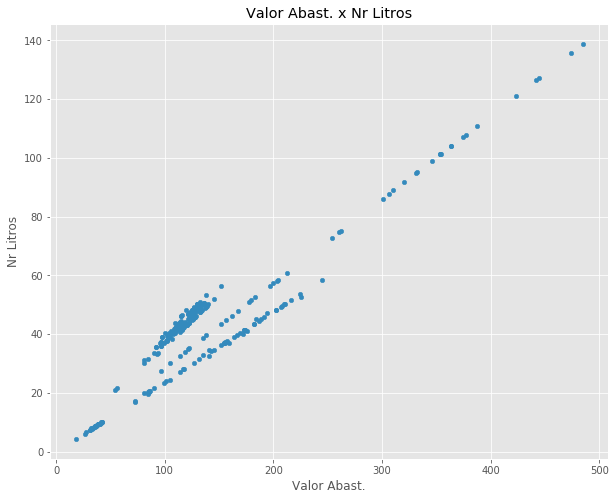

In [45]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

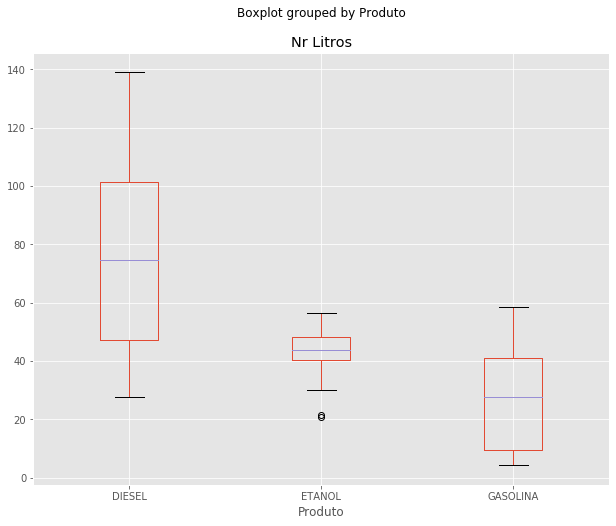

In [46]:
df.boxplot(column="Nr Litros", by="Produto")

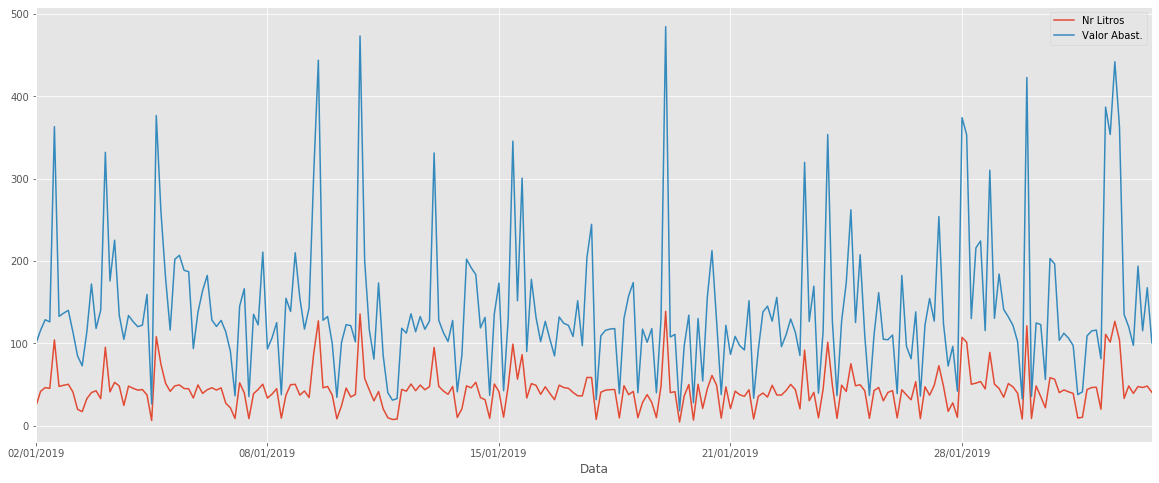

In [78]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

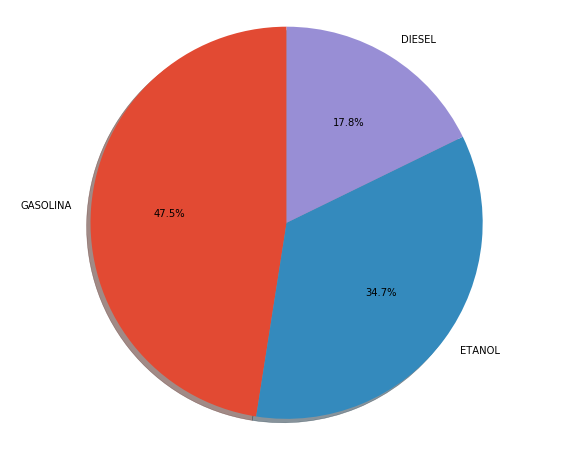

In [48]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

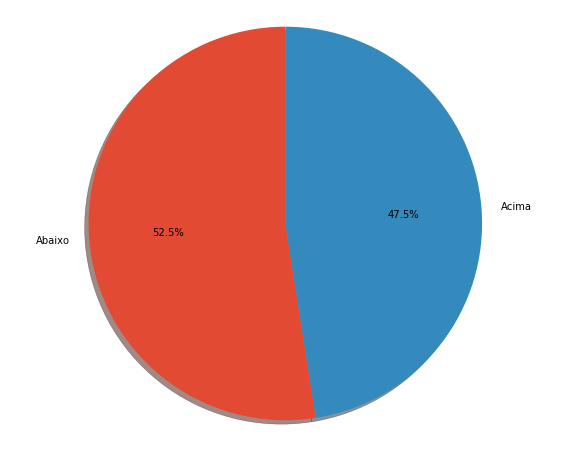

In [49]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

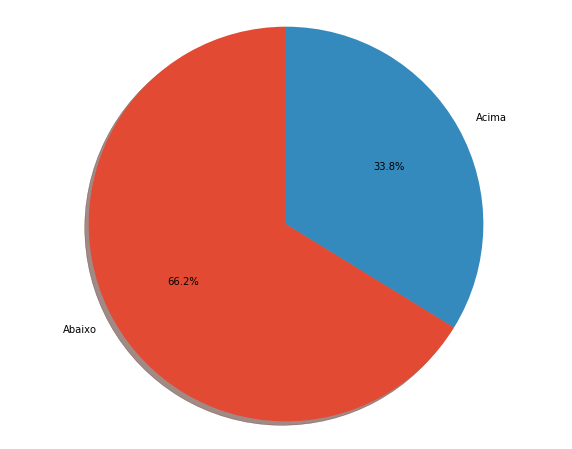

In [50]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

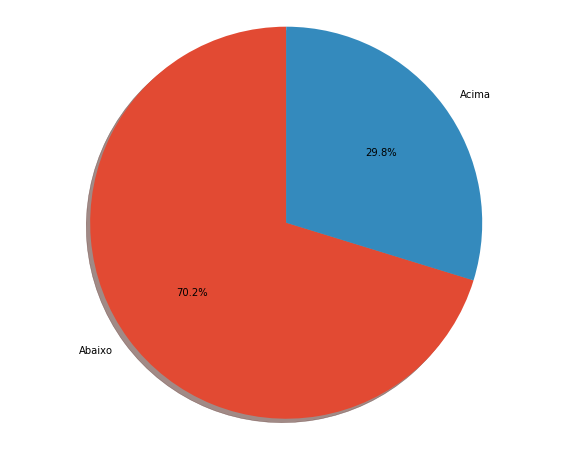

In [51]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

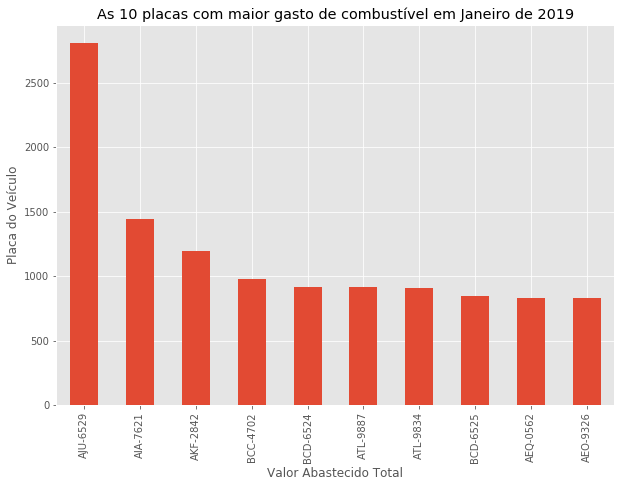

In [10]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots(figsize=(10, 7))

#format the currency
#def currency(x, pos):
#    'The two args are the value and tick position'
#    if x >= 1000000:
#        return '${:1.1f}M'.format(x*1e-6)
#    return 'R${:1.1f}K'.format(x*1e-3)

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Placa", ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019', xlabel='Valor Abastecido Total', ylabel='Placa do Veículo')
#formatter = FuncFormatter(currency)
#ax.xaxis.set_major_formatter(formatter)
#add a line for the average
ax.axvline(x = avg, color='b', label='Média', linestyle='--', linewidth=1)

#annotate the values over the average
#for placa in [0, 1, 2]:
#    ax.text(100, placa, "Acima da média")
    
#hide the legend
ax.legend().set_visible(False)

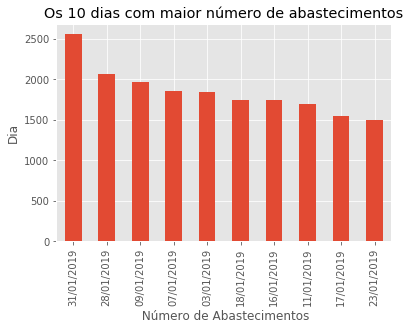

In [11]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Os 10 dias com maior número de abastecimentos', xlabel=' Número de Abastecimentos', ylabel='Dia')

#hide the legend
ax.legend().set_visible(False)

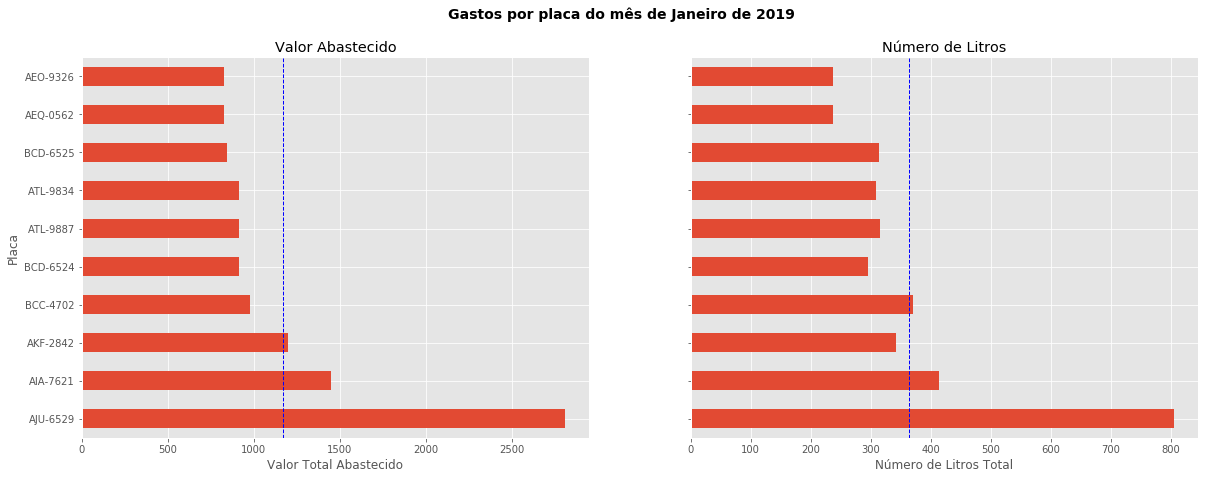

In [139]:
#get the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

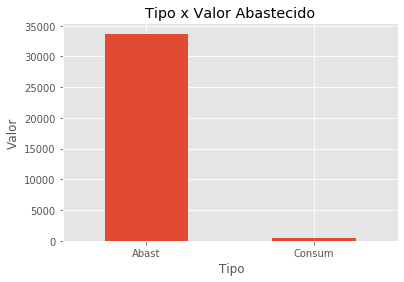

In [68]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

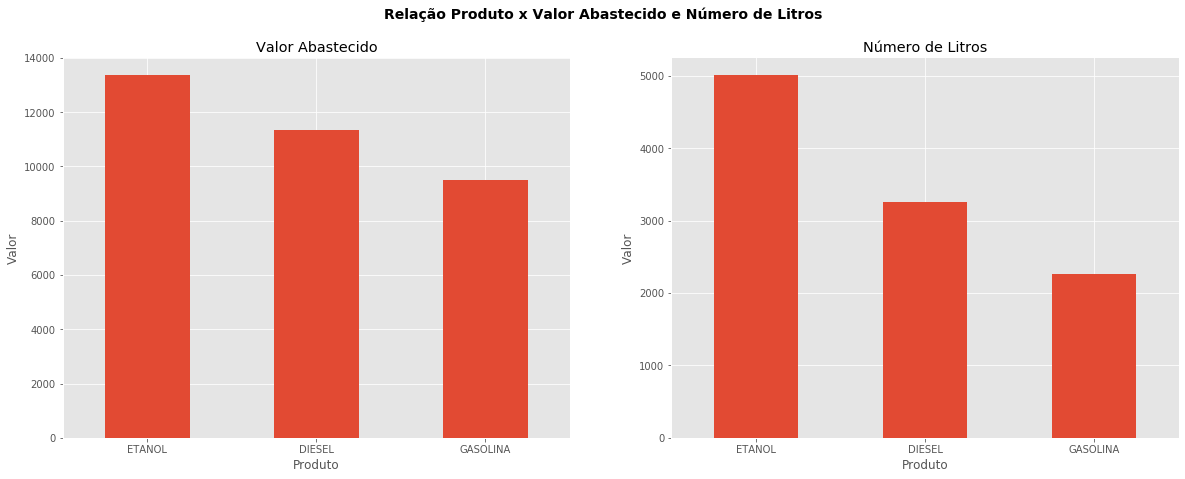

In [70]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

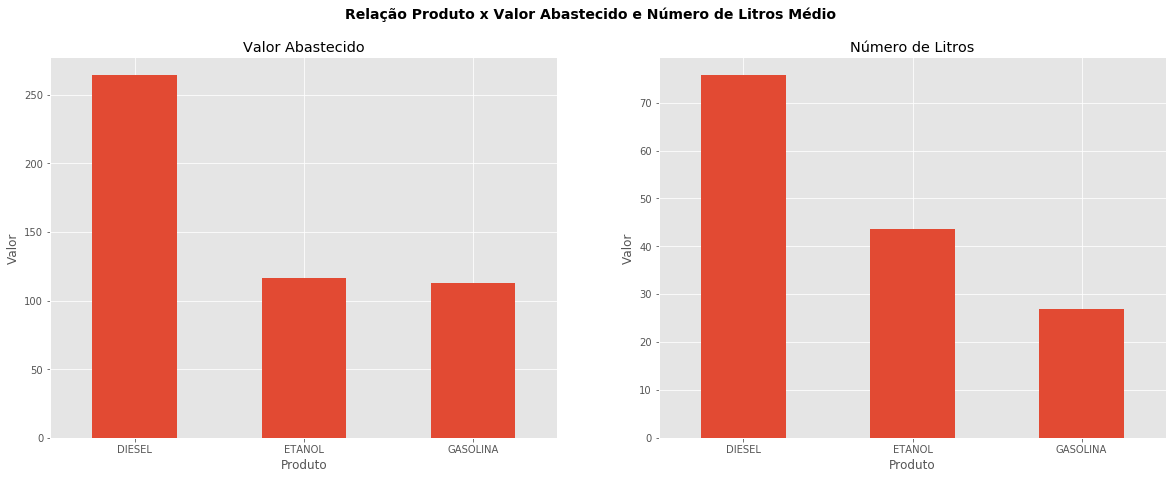

In [71]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

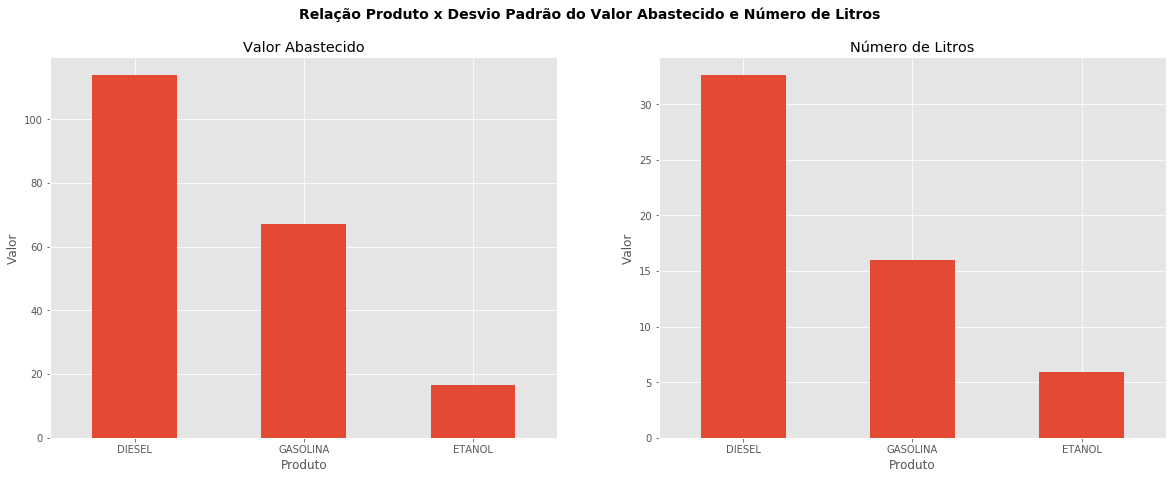

In [76]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

TypeError: 'module' object is not callable